# Статистика по авиакатастрофам с 1908 по 2009 гг.

В качестве данных для анализа был выбран набор «Статистика по авиакатастрофам с 1908 по 2009 гг.», содержащий информацию об авиакатастрофах и авиаинцидентах: жертвы, обстоятельства и самолёты.

В наборе содержатся следующие поля:
1. Date – дата происшествия,
2. Time – время происшествия,
3. Location – примерное место происшествия,
4. Operator – оператор или авиакомпания,
5. Flight# - номер полета,
6. Route – маршрут полета,
7. Type – модель летательного аппарата,
8. Registration – регистрационный номер самолета,
9. Cn/In – серийный номер самолета,
10. Aboard – количество людей на борту,
11. Fatalities – количество жертв,
12. Ground – количество жертв на земле после крушения,
13. Summary – краткое словесное описание происшествия.

Такую историческую сводку можно проанализировать, сделать выводы и использовать в следующих целях:
1. Модернизация летательных аппаратов;
2. Корректировка маршрутов с учётом сложных и опасных местностей;
3. Выявление опасных погодных условий для совершения полётов;
4. Разработка алгоритмов действия при возникновении ЧС и усовершенствование руководства по лётной эксплуатации;
5. Совершенствование авиабезопасности.

Весь набор данных содержится в файле 'Airplane_Crashes.csv'.

In [1]:
# %pip install -q numpy
# %pip install -q pandas
# %pip install -q matplotlib
# %pip install -q folium
# %pip install -q seaborn
# %pip install -q scipy
# %pip install -q missingno
# %pip install -q plotly
# %pip install -q geocoder
# %pip install -q geopy

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import folium
from folium.plugins import MarkerCluster
import geocoder
from geopy.geocoders import Nominatim
import math
import seaborn as sns
import scipy
import plotly
import missingno as msno

In [3]:
# загрузка данных
dataset = pd.read_csv('Airplane_Crashes.csv', low_memory=False)

In [4]:
dataset.head(5)

Date   Time                            Location  \
0  09/17/1908  17:18                 Fort Myer, Virginia   
1  07/12/1912  06:30             AtlantiCity, New Jersey   
2  08/06/1913    NaN  Victoria, British Columbia, Canada   
3  09/09/1913  18:30                  Over the North Sea   
4  10/17/1913  10:30          Near Johannisthal, Germany   

                 Operator Flight #          Route                    Type  \
0    Military - U.S. Army      NaN  Demonstration        Wright Flyer III   
1    Military - U.S. Navy      NaN    Test flight               Dirigible   
2                 Private        -            NaN        Curtiss seaplane   
3  Military - German Navy      NaN            NaN  Zeppelin L-1 (airship)   
4  Military - German Navy      NaN            NaN  Zeppelin L-2 (airship)   

  Registration cn/In  Aboard  Fatalities  Ground  \
0          NaN     1     2.0         1.0     0.0   
1          NaN   NaN     5.0         5.0     0.0   
2          NaN   NaN     1.0         1.0     0.0   
3          NaN   NaN    20.0        14.0     0.0   
4          NaN   NaN    30.0        30.0     0.0   

                                             Summary  
0  During a demonstration flight, a U.S. Army fly...  
1  First U.S. dirigible Akron exploded just offsh...  
2  The first fatal airplane accident in Canada oc...  
3  The airship flew into a thunderstorm and encou...  
4  Hydrogen gas which was being vented was sucked...

In [5]:
# удаляем ненужные для анализа столбцы
dataset.drop(['Flight #','Registration','cn/In'], axis=1, inplace=True)
dataset.head()

Date   Time                            Location  \
0  09/17/1908  17:18                 Fort Myer, Virginia   
1  07/12/1912  06:30             AtlantiCity, New Jersey   
2  08/06/1913    NaN  Victoria, British Columbia, Canada   
3  09/09/1913  18:30                  Over the North Sea   
4  10/17/1913  10:30          Near Johannisthal, Germany   

                 Operator          Route                    Type  Aboard  \
0    Military - U.S. Army  Demonstration        Wright Flyer III     2.0   
1    Military - U.S. Navy    Test flight               Dirigible     5.0   
2                 Private            NaN        Curtiss seaplane     1.0   
3  Military - German Navy            NaN  Zeppelin L-1 (airship)    20.0   
4  Military - German Navy            NaN  Zeppelin L-2 (airship)    30.0   

   Fatalities  Ground                                            Summary  
0         1.0     0.0  During a demonstration flight, a U.S. Army fly...  
1         5.0     0.0  First U.S. dirigible Akron exploded just offsh...  
2         1.0     0.0  The first fatal airplane accident in Canada oc...  
3        14.0     0.0  The airship flew into a thunderstorm and encou...  
4        30.0     0.0  Hydrogen gas which was being vented was sucked...

In [6]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5268 entries, 0 to 5267
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Date        5268 non-null   object 
 1   Time        3049 non-null   object 
 2   Location    5248 non-null   object 
 3   Operator    5250 non-null   object 
 4   Route       3562 non-null   object 
 5   Type        5241 non-null   object 
 6   Aboard      5246 non-null   float64
 7   Fatalities  5256 non-null   float64
 8   Ground      5246 non-null   float64
 9   Summary     4878 non-null   object 
dtypes: float64(3), object(7)
memory usage: 411.7+ KB


In [7]:
dataset.describe(include=['object', 'float', 'int'])

Date   Time           Location  Operator     Route  \
count         5268   3049               5248      5250      3562   
unique        4753   1005               4303      2476      3244   
top     09/11/2001  15:00  Sao Paulo, Brazil  Aeroflot  Training   
freq             4     32                 15       179        81   
mean           NaN    NaN                NaN       NaN       NaN   
std            NaN    NaN                NaN       NaN       NaN   
min            NaN    NaN                NaN       NaN       NaN   
25%            NaN    NaN                NaN       NaN       NaN   
50%            NaN    NaN                NaN       NaN       NaN   
75%            NaN    NaN                NaN       NaN       NaN   
max            NaN    NaN                NaN       NaN       NaN   

                Type       Aboard   Fatalities       Ground  \
count           5241  5246.000000  5256.000000  5246.000000   
unique          2446          NaN          NaN          NaN   
top     Douglas DC-3          NaN          NaN          NaN   
freq             334          NaN          NaN          NaN   
mean             NaN    27.554518    20.068303     1.608845   
std              NaN    43.076711    33.199952    53.987827   
min              NaN     0.000000     0.000000     0.000000   
25%              NaN     5.000000     3.000000     0.000000   
50%              NaN    13.000000     9.000000     0.000000   
75%              NaN    30.000000    23.000000     0.000000   
max              NaN   644.000000   583.000000  2750.000000   

                        Summary  
count                      4878  
unique                     4673  
top     Crashed during takeoff.  
freq                         15  
mean                        NaN  
std                         NaN  
min                         NaN  
25%                         NaN  
50%                         NaN  
75%                         NaN  
max                         NaN

In [8]:
dataset.isna().sum()

Date             0
Time          2219
Location        20
Operator        18
Route         1706
Type            27
Aboard          22
Fatalities      12
Ground          22
Summary        390
dtype: int64

In [9]:
for col in dataset.columns:
    pct_missing = np.mean(dataset[col].isnull())
    print('{} - {}%'.format(col, round(pct_missing*100, 2)))

Date - 0.0%
Time - 42.12%
Location - 0.38%
Operator - 0.34%
Route - 32.38%
Type - 0.51%
Aboard - 0.42%
Fatalities - 0.23%
Ground - 0.42%
Summary - 7.4%


In [10]:
# матрица корреляции пропущенных значений
dataset[['Location', 'Operator', 'Type', 'Aboard', 'Fatalities', 'Ground']].isnull().corr()

Location  Operator      Type    Aboard  Fatalities    Ground
Location    1.000000  0.049281 -0.004431  0.043866    0.061797  0.043866
Operator    0.049281  1.000000  0.269130 -0.003792   -0.002798 -0.003792
Type       -0.004431  0.269130  1.000000  0.077796    0.108094  0.077796
Aboard      0.043866 -0.003792  0.077796  1.000000    0.737846  0.543548
Fatalities  0.061797 -0.002798  0.108094  0.737846    1.000000  0.737846
Ground      0.043866 -0.003792  0.077796  0.543548    0.737846  1.000000

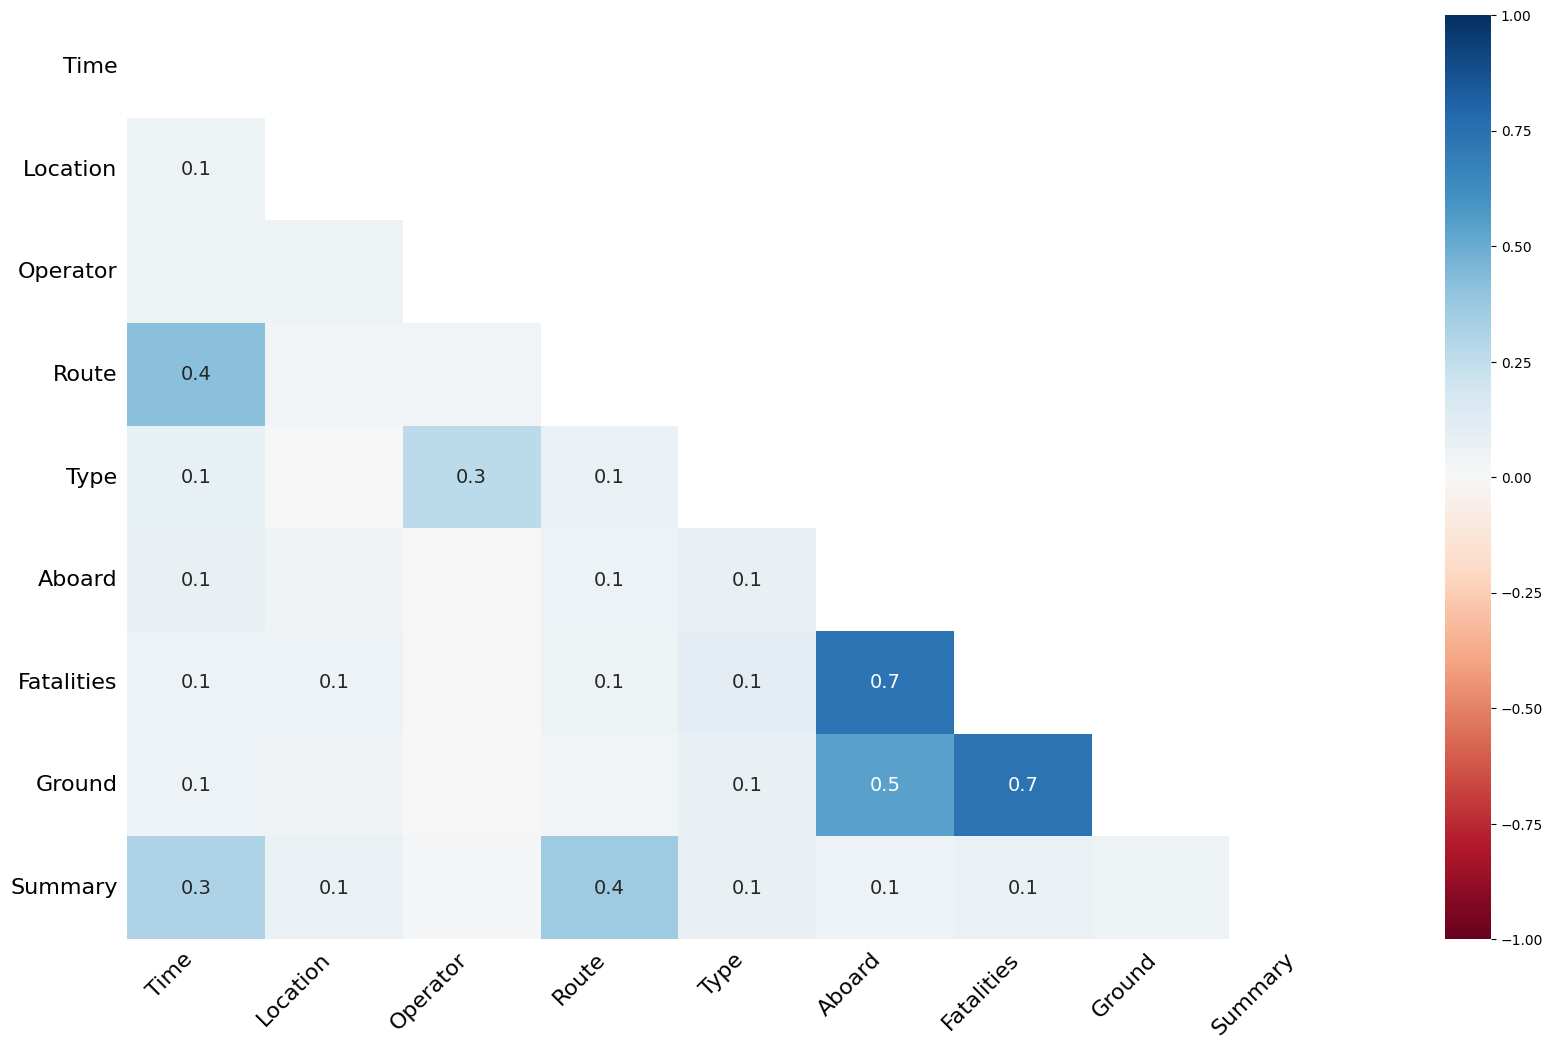

In [11]:
msno.heatmap(dataset);

In [12]:
# удаляем строки с пропусками в данных колонках
dataset.dropna(subset=['Location', 'Type', 'Operator'], axis=0, inplace=True)

In [13]:
# значения, которые невозможно восстановить, но и удалять строки нельзя т.к. слишком большой %, заменяем на unknown
dataset['Time'] = dataset['Time'].fillna('unknown')
dataset['Summary'] = dataset['Summary'].fillna('unknown')
dataset['Route'] = dataset['Route'].fillna('unknown')

In [14]:
# заменяем числовые на медианы по группам
for col in ['Aboard', 'Ground', 'Fatalities']:
    dataset[col] = dataset[col].fillna(dataset.groupby('Type')[col].transform('mean'))
dataset.isna().sum() 

Date          0
Time          0
Location      0
Operator      0
Route         0
Type          0
Aboard        8
Fatalities    3
Ground        7
Summary       0
dtype: int64

In [15]:
dataset.dropna(subset=['Aboard', 'Fatalities', 'Ground'], axis=0, inplace=True)

In [16]:
for col in dataset.columns:
    pct_missing = np.mean(dataset[col].isnull())
    print('{} - {}%'.format(col, round(pct_missing*100, 2)))

Date - 0.0%
Time - 0.0%
Location - 0.0%
Operator - 0.0%
Route - 0.0%
Type - 0.0%
Aboard - 0.0%
Fatalities - 0.0%
Ground - 0.0%
Summary - 0.0%


In [17]:
dataset.duplicated().sum()

0

In [18]:
dataset.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5198 entries, 0 to 5267
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Date        5198 non-null   object 
 1   Time        5198 non-null   object 
 2   Location    5198 non-null   object 
 3   Operator    5198 non-null   object 
 4   Route       5198 non-null   object 
 5   Type        5198 non-null   object 
 6   Aboard      5198 non-null   float64
 7   Fatalities  5198 non-null   float64
 8   Ground      5198 non-null   float64
 9   Summary     5198 non-null   object 
dtypes: float64(3), object(7)
memory usage: 3.6 MB


In [19]:
for col in ['Aboard', 'Fatalities', 'Ground']:
    dataset[col] = dataset[col].astype(int)

In [20]:
optimized_ds = dataset.copy()

col_int = dataset.select_dtypes(include=['int'])
converted_int = col_int.apply(pd.to_numeric, downcast='unsigned')
optimized_ds[converted_int.columns] = converted_int

for col in dataset.select_dtypes(include=['object']).columns:
    optimized_ds[col] = optimized_ds[col].astype('string')

optimized_ds['Date'] = pd.to_datetime(optimized_ds['Date'])

dataset = optimized_ds

In [21]:
dataset.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5198 entries, 0 to 5267
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Date        5198 non-null   datetime64[ns]
 1   Time        5198 non-null   string        
 2   Location    5198 non-null   string        
 3   Operator    5198 non-null   string        
 4   Route       5198 non-null   string        
 5   Type        5198 non-null   string        
 6   Aboard      5198 non-null   uint16        
 7   Fatalities  5198 non-null   uint16        
 8   Ground      5198 non-null   uint16        
 9   Summary     5198 non-null   string        
dtypes: datetime64[ns](1), string(6), uint16(3)
memory usage: 3.2 MB


In [22]:
# добавим новый столбец "Выжившие"
dataset['Survived'] = dataset['Aboard'] - dataset['Fatalities']

In [23]:
# выделим год из даты в отдельный столбец
dataset['Year'] = dataset['Date'].dt.to_period("Y")

In [24]:
# поменяем местами столбцы для наглядности
dataset = dataset[['Date',
                   'Year',
                   'Time', 
                   'Location', 
                   'Route', 
                   'Operator', 
                   'Type', 
                   'Aboard', 
                   'Survived', 
                   'Fatalities', 
                   'Ground', 
                   'Summary']]
dataset.head()

Date  Year     Time                            Location  \
0 1908-09-17  1908    17:18                 Fort Myer, Virginia   
1 1912-07-12  1912    06:30             AtlantiCity, New Jersey   
2 1913-08-06  1913  unknown  Victoria, British Columbia, Canada   
3 1913-09-09  1913    18:30                  Over the North Sea   
4 1913-10-17  1913    10:30          Near Johannisthal, Germany   

           Route                Operator                    Type  Aboard  \
0  Demonstration    Military - U.S. Army        Wright Flyer III       2   
1    Test flight    Military - U.S. Navy               Dirigible       5   
2        unknown                 Private        Curtiss seaplane       1   
3        unknown  Military - German Navy  Zeppelin L-1 (airship)      20   
4        unknown  Military - German Navy  Zeppelin L-2 (airship)      30   

   Survived  Fatalities  Ground  \
0         1           1       0   
1         0           5       0   
2         0           1       0   
3         6          14       0   
4         0          30       0   

                                             Summary  
0  During a demonstration flight, a U.S. Army fly...  
1  First U.S. dirigible Akron exploded just offsh...  
2  The first fatal airplane accident in Canada oc...  
3  The airship flew into a thunderstorm and encou...  
4  Hydrogen gas which was being vented was sucked...

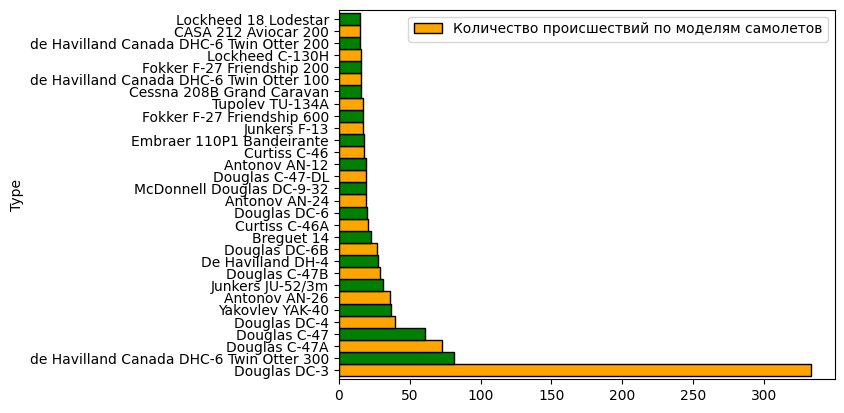

In [25]:
# ВИЗУАЛИЗАЦИЯ

crash_by_type = dataset['Type'].value_counts()
crash_by_type = pd.DataFrame({'Type':crash_by_type.index, 'Count':crash_by_type.values})
crash_by_type.drop(crash_by_type.index[30:], inplace=True)

plot = crash_by_type.plot.barh(x='Type', y='Count', label='Количество происшествий по моделям самолетов', 
                               color=['orange','green'], width=1, edgecolor='k', linewidth=1)


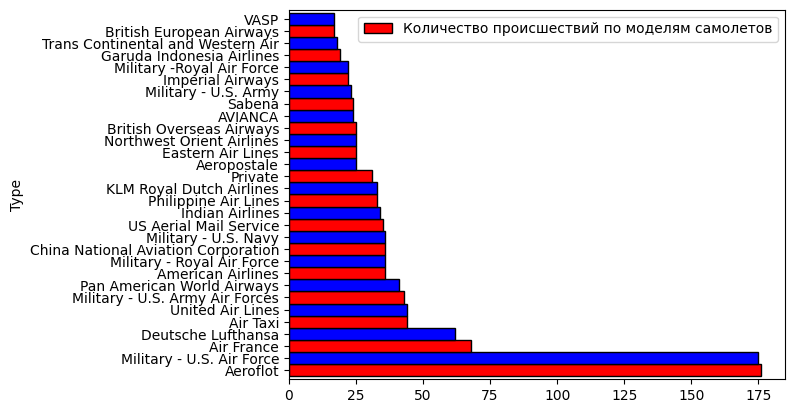

In [26]:
crash_by_operator = dataset['Operator'].value_counts()
crash_by_operator = pd.DataFrame({'Type':crash_by_operator.index, 'Count':crash_by_operator.values})
crash_by_operator.drop(crash_by_operator.index[30:], inplace=True)

plot = crash_by_operator.plot.barh(x='Type', y='Count', label='Количество происшествий по моделям самолетов', 
                                   color=['red','blue'], width=1, edgecolor='k', linewidth=1)


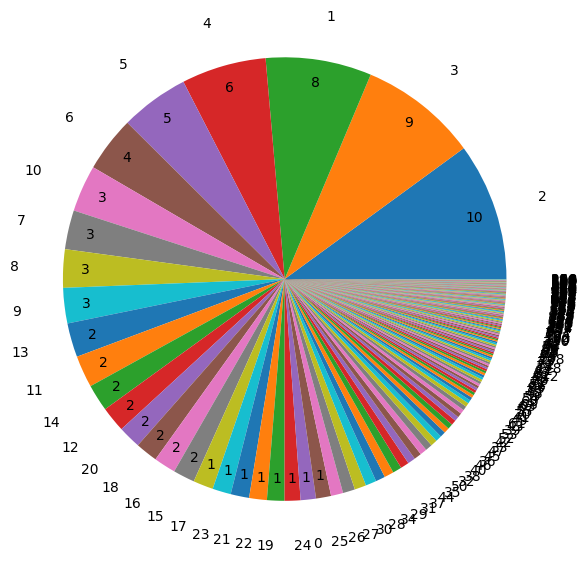

In [27]:
# fatalities = dataset['Fatalities'].value_counts()
# fatalities = pd.DataFrame({'Fatalities':fatalities.index, 'Count':fatalities.values})
# # fatalities.drop(fatalities.index[30:], inplace=True)


# plot = plt.pie(fatalities['Count'], labels = fatalities['Fatalities'], radius=1.5,
#                labeldistance = 1.2, pctdistance=0.9,
#               autopct = lambda p: format(p,'.0f') if p > 1 else None)

In [55]:
fatalities = dataset['Fatalities'].value_counts()
fatalities = pd.DataFrame({'Fatalities':fatalities.index, 'Count':fatalities.values}).sort_values('Fatalities')

fat1_6 = 0
for i in range(1,7):
    fat1_6 += fatalities.iloc[i]['Count']

fat_all = fatalities['Count'].sum()

print('Процент авиакатастроф с числом жертв от 1 до 6: ', round((fat1_6/fat_all)*100, 2), '%')


Процент авиакатастроф с числом жертв от 1 до 6:  41.59 %


In [29]:
# ds_copy = pd.read_csv('Airplane_Crashes.csv', low_memory=False)
# fatalities = ds_copy['Fatalities'].value_counts()
# fatalities = pd.DataFrame({'Fatalities':fatalities.index, 'Count':fatalities.values}).sort_values('Fatalities')

# fat1_6 = 0
# for i in range(1,7):
#     fat1_6 += fatalities.iloc[i]['Count']

# fat_all = fatalities['Count'].sum()

# print('Процент авиакатастроф с числом жертв от 1 до 6 для неочищенного набора: ', round((fat1_6/fat_all)*100, 2), '%')

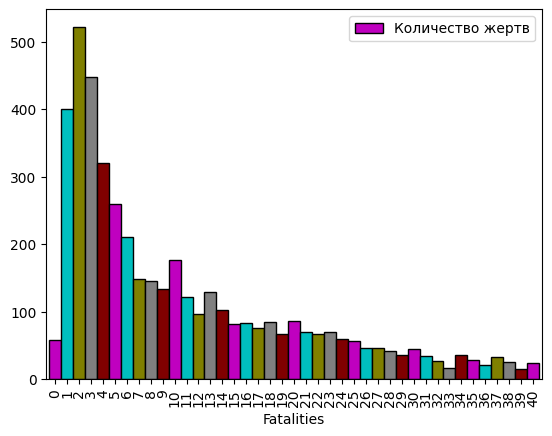

In [56]:
fatalities.drop(fatalities.index[41:], inplace=True)
plot = fatalities.plot.bar(x='Fatalities', y='Count', label='Количество жертв', 
                           color=['m','c','olive','gray','maroon'], width=1, edgecolor='k', linewidth=1)

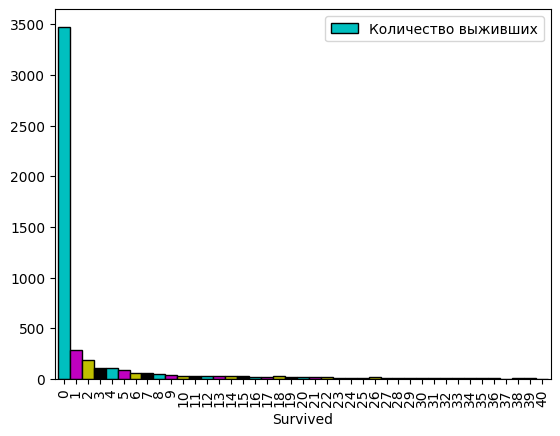

In [31]:
survived = dataset['Survived'].value_counts()
survived = pd.DataFrame({'Survived':survived.index, 'Count':survived.values}).sort_values('Survived')
survived.drop(survived.index[41:], inplace=True)

plot = survived.plot.bar(x='Survived', y='Count', label='Количество выживших', 
                           color=['c','m','y','k'], width=1, edgecolor='k', linewidth=1)

In [32]:
surv_0 = survived.iloc[0]['Count']
surv_all = survived['Count'].sum()

print('Процент авиакатастроф с нулем выживших: ', round((surv_0/surv_all)*100, 2), '%')

Процент авиакатастроф с нулем выживших:  70.19 %


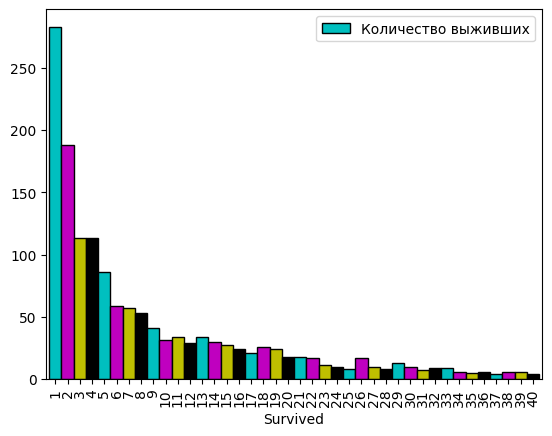

In [33]:
survived.drop(survived.index[0], inplace=True)
plot = survived.plot.bar(x='Survived', y='Count', label='Количество выживших', 
                           color=['c','m','y','k'], width=1, edgecolor='k', linewidth=1)

In [34]:
summary = pd.DataFrame({'Summary': dataset['Summary'].values})
summary.head()

Summary
0  During a demonstration flight, a U.S. Army fly...
1  First U.S. dirigible Akron exploded just offsh...
2  The first fatal airplane accident in Canada oc...
3  The airship flew into a thunderstorm and encou...
4  Hydrogen gas which was being vented was sucked...

In [35]:
# разбиваем столбец с описаниями на отдельные слова, считаем количество повторений каждого слова, удаляем предлоги
summary['Summary'] = summary.Summary.str.lower().str.replace('\W', ' ', regex=True)
summary = summary.Summary.str.split(expand=True).stack().value_counts()
summary.drop(['the','a','to','and','of','in','s','into','was','on','while','an',
              'by','after','at','from','it','with','for','were','which','unknown'], axis=0, inplace=True)
summary = pd.DataFrame({'word':summary.index, 'count':summary.values})
summary.head(30)

word  count
0      crashed   3188
1     aircraft   2473
2        plane   1848
3        pilot   1286
4       flight   1166
5          off   1043
6       engine    942
7     approach    940
8       runway    911
9      failure    880
10        crew    810
11      during    781
12     landing    733
13     airport    626
14    altitude    608
15     weather    600
16         not    586
17    mountain    555
18     takeoff    543
19  conditions    537
20      taking    532
21        land    517
22      struck    504
23     control    502
24      ground    492
25       cargo    471
26        fire    468
27       route    449
28       miles    435
29  attempting    429

<AxesSubplot: ylabel='word'>

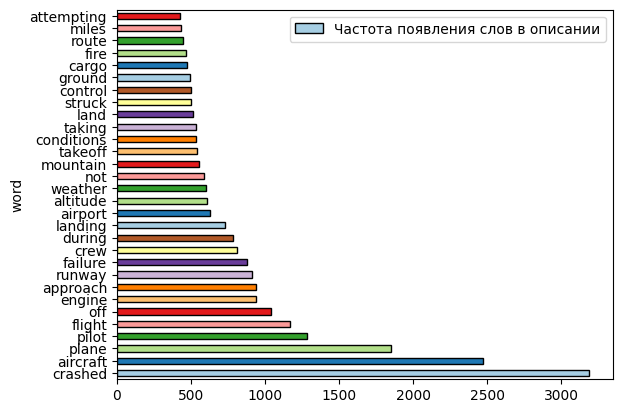

In [36]:
# оставляем только топ 30 значений
summary.drop(summary.index[30:], inplace=True)
summary.plot.barh(x='word', y='count', label='Частота появления слов в описании', 
                  color=plt.get_cmap('Paired').colors, edgecolor='k', linewidth=1)

In [37]:
# print('Гипотеза 3: landing > takeoff')
print('landing: ', summary.iloc[12]['count'])
print('takeoff: ', summary.iloc[18]['count'])
# много пропусков в описаниях но это не кол-нная а отн-ая статистика

landing:  733
takeoff:  543


In [38]:
crash_by_decade = dataset['Year'].value_counts() 
crash_by_decade = crash_by_decade.groupby((crash_by_decade.index.year//10)*10).sum()
crash_by_decade = pd.DataFrame({'Decade':crash_by_decade.index, 'Count':crash_by_decade.values}).sort_values('Decade')
crash_by_decade.head(11).sort_values(by=['Count'], ascending=False)

Decade  Count
7     1970    833
9     1990    770
6     1960    715
8     1980    714
5     1950    589
10    2000    578
4     1940    490
3     1930    314
2     1920    167
1     1910     27
0     1900      1

<AxesSubplot: xlabel='Decade'>

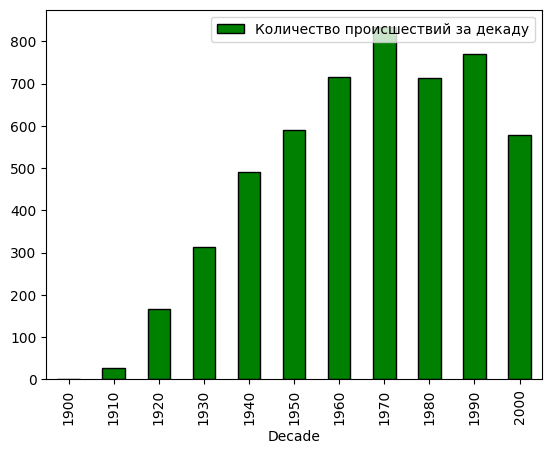

In [39]:
crash_by_decade.plot.bar(x='Decade', y='Count', label='Количество происшествий за декаду', 
                         color='green', edgecolor='k', linewidth=1)

In [40]:
crash_by_year = dataset['Year'].value_counts()
crash_by_year = pd.DataFrame({'Year':crash_by_year.index, 'Count':crash_by_year.values}).sort_values('Year')
crash_by_year.head(100).sort_values(by=['Count'], ascending=False)

Year  Count
0   1972    104
1   1968     96
2   1989     93
3   1967     91
4   1973     89
..   ...    ...
93  1918      4
94  1913      3
95  1915      2
96  1912      1
97  1908      1

[98 rows x 2 columns]

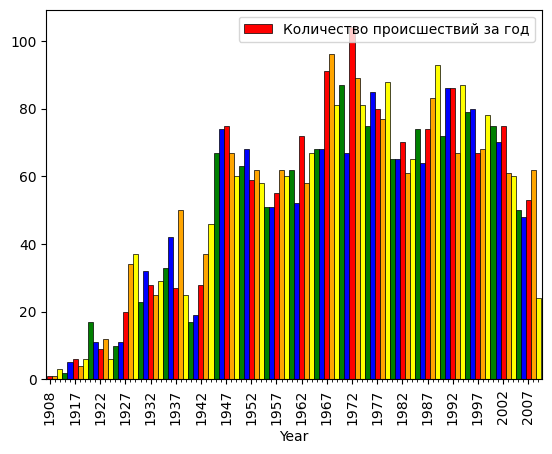

In [41]:
axes = crash_by_year.plot.bar(x='Year', y='Count', label='Количество происшествий за год', 
                              color=['red','orange','yellow','green','blue'], width=1, edgecolor='k', linewidth=0.5)
axes.xaxis.set_major_locator(plt.MaxNLocator(20))
axes.xaxis.set_minor_locator(plt.MaxNLocator(100))

In [42]:
print('Гипотеза 1: сумма происшествий за период до 1980 больше чем после')

Гипотеза 1: сумма происшествий за период до 1980 больше чем после


In [43]:
sum_before_1980 = 0
sum_after_1980 = 0
for i in range(8):
    sum_before_1980 += crash_by_decade.loc[i]['Count']
for i in range(8,11):
    sum_after_1980 += crash_by_decade.loc[i]['Count']
    
print('Сумма происшествий до 1980 года: ', sum_before_1980)
print('Сумма происшествий после 1980 года: ', sum_after_1980)

Сумма происшествий до 1980 года:  3136
Сумма происшествий после 1980 года:  2062


In [44]:
# crash_by_loc = dataset['Location'].value_counts()
# crash_by_loc = pd.DataFrame({'Location':crash_by_loc.index, 'Count':crash_by_loc.values})

In [45]:
# geolocator = Nominatim(user_agent='myapplication')

# locations_dict = {'Name': [], 'Lat': [], 'Long': [], 'Count': []}

# locations = pd.DataFrame(columns=['Location','Long','Lat'])
# new_df = pd.DataFrame(dataset)[:5].copy(deep=True)

In [46]:
# for loc in crash_by_loc['Location']:
# for index, value in crash_by_loc.items():
#     try:
#         location = geolocator.geocode(str(index))
#         if location != None:
#             locations_dict['Name'].append(index)
#             locations_dict['Count'].append(value)
#             locations_dict['Lat'].append(location.raw['lat'])
#             locations_dict['Long'].append(location.raw['lon'])   
#     except:
#         pass

In [47]:
# locations_df = pd.DataFrame(locations_dict, dtype=str)
# locations_df.to_csv('locations.csv')

In [48]:
locations_df = pd.read_csv('locations.csv')
locations_df.head()

Unnamed: 0                 Name        Lat        Long  Count
0           0    Sao Paulo, Brazil -23.550651  -46.633382     15
1           1       Moscow, Russia  55.750446   37.617494     14
2           2    Anchorage, Alaska  61.216313 -149.894852     13
3           3  Manila, Philippines  14.594891  120.978262     13
4           4     Bogota, Colombia   4.653465  -74.083645     13

In [49]:
# Make an empty map
m = folium.Map(location=[20,0], tiles="OpenStreetMap", zoom_start=2)
marker_cluster = MarkerCluster().add_to(m)
# add marker one by one on the map
for i in range(0,len(locations_df)):
   folium.CircleMarker(
      location=[locations_df.iloc[i]['Lat'], locations_df.iloc[i]['Long']],
      popup=locations_df.iloc[i]['Name'] + ' Count = ' + str(locations_df.iloc[i]['Count']),
      radius = 10
       
   ).add_to(marker_cluster)

# Show the map
m


In [50]:
print('Гипотеза 3: сумма происшествий В США больше чем во всей Европе')
# Обоснования: площадь, военные самолеты, большое колво ближнемагистральных внутр рейсов

Гипотеза 3: сумма происшествий В США больше чем во всей Европе
